# Welcome to Image Classification

## 이 노트북은 Image classification에 대한 기본적인 instruction을 제공합니다.

### 해당 Instruction의 목표

- Image classification에서의 training step의 argument 설정
- 

#### 학습을 시작하기 전에 각 데이터에 대한 데이터 경로, 라벨을 포함하는 파일(=ground truth 파일)이 필요합니다.

#### 만약 데이터들이 폴더명이 라벨로 이루어진 폴더 안에 미리 분류되어 있는 경우 다음 함수를 통해 쉽게 ground truth 파일을 생성할 수 있습니다.

#### 그렇지 않은 경우 직접 함수를 구현하여 ground truth 파일을 생성하는 과정이 필요합니다.

In [1]:
# 예시: 아래 주석을 풀어 ground truth 파일을 생성합니다.
# data_type : 값이 png/jpg인 경우 경로 내의 png/jpg 파일에 대해서만 ground truth 파일 생성이진행됩니다.
# png 와 jpg 파일 모두에 대해 진행하고 싶은 경우 data_type = both 로 입력합니다.

# from wrapping import make_ground_truth

# # 데이터들이 미리 분류되어 있는 폴더들의 부모 디렉토리를 입력합니다.
# example_data_path = './data_path_example/'
# example_save_path = './save_path_example/train.csv'
# make_ground_truth(data_path=example_data_path, save_path=example_save_path,data_type='both')

In [2]:
from wrapping import Wrapper

2023-11-14 09:07:24.568456: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 09:07:24.617379: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 09:07:24.617425: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 09:07:24.617469: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 09:07:24.627045: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 09:07:24.628046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

아래는 ALO 기본 설정 및 라이브러리 설치 코드입니다. 설치 에러가 발생하면 아래 셀을 재실행 하고, 지속적으로 문제가 있을 시 문의바랍니다

## Train workflow

In [3]:
# 아래는 Train 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
wrapper = Wrapper(0)

self.pipeline is : train_pipeline
pipelines is : ['train_pipeline', 'inference_pipeline']
[2023-11-14 09:07:33,482][PROCESS][INFO]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << ACCESS_KEY, SECRET_KEY >> in your os environment. 

[2023-11-14 09:07:33,488][PROCESS][INFO]:  Skip loading external data. << /nas001/users/ruci.sung/mnist/train/ >> 
 << train >> already exists in << /home/jovyan/icTestDir/ic/alo/input/ >>. 
 & << get_external_data >> is set as << once >>. 

[2023-11-14 09:07:33,522][PROCESS][INFO]: Start setting-up << input >> asset @ << assets >> directory.
[2023-11-14 09:07:33,544][PROCESS][INFO]: << input >> asset had already been created at 2023-11-10 06:42:35.221723
[2023-11-14 09:07:33,548][PROCESS][INFO]: Start setting-up << train >> asset @ << assets >> directory.
[2023-11-14 09:07:33,552][PROCESS][INFO]: << tra

### Input(step=0) asset을 실행합니다.
#### `run` 메소드 안에서 자동으로 iterate 하므로  `step` 값은 입력할 필요 없습니다.

In [4]:
# IC train asset 순서에 따라 step 순서를 입력합니다. : (input(0) - train(1))
## input asset
wrapper.run()


[2023-11-14 09:07:34,177][ASSET][INFO][train_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-14 09:07:34
- current step      : input
- asset branch.     : vision_2.0
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'y_column', 'path_column', 'data_source_type', 'label_names', 'prediction_column_prefix', 'probability_column_prefix', 'set_images'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])


>>>>> Load path : ['/home/jovyan/icTestDir/ic/alo/input/train//']
/home/jovyan/icTestDir/ic/alo/.asset_interface/train_pipeline/ 폴더와 하위 디렉토리가 삭제되었습니다.
/home/jovyan/icTestDir/ic/alo/.asset_interface/train_pipeline/ 폴더가 생성되었

/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_image_path'] = data.apply(save_image_as_npy, axis=1)
/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.path_column] = data['new_image_path']
/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

### train asset args 변경하기

##### train asset의 args수정 및 확인

- 필요한경우 ic_args의 항목을 ***ic_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [5]:
# IC train asset 순서에 따라 step 순서(값)를 입력합니다. (input(0) - train(1))
ic_args = wrapper.get_args(step=1)

# 아래 주석을 풀어 ic_args를 수정합니다.
# ic_args['epochs] = 1024
ic_args

{'model_type': 'mobilenetv1',
 'input_shape': [28, 28, 1],
 'resize_shape': [224, 224, 3],
 'epochs': 10,
 'batch_size': 64,
 'train_ratio': 0.8,
 'rand_augmentation': False,
 'num_aug': 3,
 'aug_magnitude': 7,
 'exclude_aug_lst': ['Rotate', 'Solarize', 'Color', 'Posterize', 'Brightness']}

## 다음 과정들을 통해 IC asset들의 argument들을 customize 할 수 있습니다.

----
### arguments 설명

|args|explanation|default|example|data type|necessary|
|---|---|---|---|---|---|
|model_type|이미지 분류를 위한 네트워크 모델 타입|`mobilenetv1`|`mobilenetv1, high_resolution`|str|yes|
|resize_shape|resizing 후의 이미지 shape|[224,224,3]|[224,224,3]|list|yes|
|epochs|training epochs 횟수|10|10|int|no|
|batch_size|미니 배치 크기|64|64|int|no|
|train_ratio|tratin/validation dataset 분할 시 train dataset 비율|`0.8`|`0 ~ 1.0`|float|no|
|rand_augmentation|random augmentation 사용 여부|False|False|bool|no|
|num_aug|이미지 당 num_aug 횟수 만큼 random augmenation을 iterative 하게 적용합니다 |`3`|`1~16`|int|no|
|aug_magnitude|random augmenation 적용 세기 |`7`|`0~10`|float|no|
|exclude_aug_lst|제외하고 싶은 random augmentation 기법 리스트|[]|[Rotate,Solarize,Color]|list|no|

 

### A. training step에서 필요한 하이퍼파라미터를 설정합니다.


#### A-1. 기본적인 하이퍼파리미터


- resize_shape : 모든 이미지들을 해당 크기로 변환합니다.
- epochs : traing epoch를 설정합니다. 너무 작으면 학습이 완료되지 않고, 너무 크면 학습에 너무 오랜 기간이 걸릴 수 있습니다.
- batch_size : 미니 배치 사이즈를 설정합니다. 너무 큰 값을 설정하면 학습 환경에 따라 학습이 되지 않을 수 있습니다.
- train_ratio : input dataset을 train dataset, validation dataset으로 분할 시 train set의 비율을 설정합니다.
- rand_augmentation : 이미지 전처리 시 random augmentation을 사용할 지 여부를 설정합니다.


In [6]:
ic_args['resize_shape'] = [224,224,3]
ic_args['epochs'] = 2
ic_args['batch_size'] = 128
ic_args['train_ratio'] = 0.85
ic_args['rand_augmentation'] = True

#### A-2. Random augmentation 사용 시 파라미터를 설정합니다. 사용하지 않으면 아래 arg는 입력하지 않아도 됩니다.


- num_aug : random augmentation 시 각 이미지는 num_aug 수 만큼 iterative 하게 random augmentation이 적용됩니다. 1~16 사이의 int값을 입력합니다.
- aug_magnitude: random augmentation 시 aug_magnitude 만큼의 세기로 augmentation을 적용합니다. 해당 값은 random augmentation에 사용되는 모든 기법에 동일하게 적용됩니다.
- exclude_aug_lst : random augmentation 시 경우에 따라 불필요하거나 오히려 performance를 저하시킨다고 의심되는 기법들을 exclude_aug_lst에 포함시키면 해당 기법은 random augmentation에서 제외됩니다. 가능한 기법들은 다음과 같이 16개 입니다.

|번호|augmentation 기법|
|---|---|
|1|SolarizeAdd|
|2|Invert|
|3|Cutout|
|4|AutoContrast|
|5|Equalize|
|6|Rotate|
|7|Solarize|
|8|Color|
|9|Posterize|
|10|Contrast|
|11|Brightness|
|12|Sharpness|
|13|ShearX|
|14|ShearY|
|15|TranslateX|
|6|TranslateY|





In [7]:
ic_args['num_aug'] = 8
ic_args['aug_magnitude'] = 5
ic_args['exclude_aug_lst'] = ['Rotate','Posterize','ShearY']

In [8]:
wrapper.run(args=ic_args) # 변경한 ic_args 반영
# wrapper.data: ic asset의 결과물입니다. 다음 asset 실행 시 필요합니다. 
# wrapper.config: ic asset의 결과 config입니다. 다음 asset실행 시 필요합니다. 

# preprocess asset의 결과 dataframe은 wrapper.data['dataframe']으로 확인할 수 있습니다. 
wrapper.data['dataframe'].head(10) 

[2023-11-14 09:07:42,720][ASSET][INFO][train_pipeline][train]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-14 09:07:42
- current step      : train
- asset branch.     : main
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['model_type', 'input_shape', 'resize_shape', 'epochs', 'batch_size', 'train_ratio', 'rand_augmentation', 'num_aug', 'aug_magnitude', 'exclude_aug_lst'])
- load config. keys : dict_keys(['meta', 'x_columns', 'y_column', 'path_column', 'label_names', 'prediction_column_prefix', 'probability_column_prefix'])
- load data keys    : dict_keys(['dataframe'])


[2023-11-14 09:07:42,769][ASSET][INFO][train_pipeline][train]: Successfully got model p

/home/jovyan/conda/envs/ic/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2023-11-14 09:10:18.336689: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-14 09:10:18.336730: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-14 09:10:18.337092: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpk3tgfpaw
2023-11-14 09:10:18.351905: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-14 09:10:18.351926: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpk3tgfpaw
2023-11-14 09:10:18.384400: I tensorflow/compiler/mlir/mlir_graph

[2023-11-14 09:10:19,798][ASSET][INFO][train_pipeline][train]: 

============================= ASSET FINISH ===========================
- time (UTC)        : 2023-11-14 09:10:19
- current step      : train
- save config. keys : dict_keys(['meta', 'x_columns', 'y_column', 'path_column', 'label_names', 'prediction_column_prefix', 'probability_column_prefix'])
- save data keys    : dict_keys(['dataframe', 'df_confusion', 'eval_score', 'original_image_dataset', 'augmented_image_dataset'])


[2023-11-14 09:10:19,802][PROCESS][INFO]: ==================== Finish pipeline: train_pipeline / step: train
dataframe <class 'pandas.core.frame.DataFrame'>
df_confusion <class 'pandas.core.frame.DataFrame'>
eval_score <class 'dict'>
original_image_dataset <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
augmented_image_dataset <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>

model_type <class 'str'>
input_shape <class 'list'>
resize_shape <class 'list'>
epochs <class 

,image_path,label,pred_label,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9
0,/home/jovyan/icTestDir/ic/alo/.asset_interface...,7,7,0.002691,0.017385,0.003608,0.095112,0.070924,0.106907,0.009502,0.570864,0.030186,0.092820
1,/home/jovyan/icTestDir/ic/alo/.asset_interface...,7,5,0.007903,0.029922,0.005278,0.157826,0.113437,0.211921,0.040034,0.193008,0.151987,0.088683
2,/home/jovyan/icTestDir/ic/alo/.asset_interface...,7,7,0.006677,0.020933,0.004765,0.124838,0.091750,0.165142,0.024095,0.421785,0.036540,0.103476
3,/home/jovyan/icTestDir/ic/alo/.asset_interface...,8,8,0.003978,0.012682,0.006638,0.065890,0.163118,0.069758,0.029085,0.016414,0.608088,0.024349
4,/home/jovyan/icTestDir/ic/alo/.asset_interface...,4,6,0.003572,0.092155,0.030796,0.333553,0.087711,0.073320,0.360222,0.001866,0.016535,0.000270
5,/home/jovyan/icTestDir/ic/alo/.asset_interface...,3,3,0.003152,0.120140,0.001346,0.828726,0.005652,0.011002,0.026851,0.001184,0.001790,0.000158
6,/home/jovyan/icTestDir/ic/alo/.asset_interface...,3,3,0.007069,0.108322,0.003661,0.799599,0.006786,0.020979,0.045362,0.002841,0.004505,0.000876
7,/home/jovyan/icTestDir/ic/alo/.asset_interface...,1,1,0.003129,0.466294,0.006594,0.351225,0.008195,0.111547,0.040970,0.003533,0.007864,0.000647
8,/home/jovyan/icTestDir/ic/alo/.asset_interface...,6,6,0.005339,0.107768,0.028590,0.282625,0.045656,0.160740,0.335799,0.004612,0.028262,0.000609
9,/home/jovyan/icTestDir/ic/alo/.asset_interface...,1,3,0.008769,0.297020,0.007118,0.496844,0.012949,0.077833,0.073466,0.003777,0.021562,0.000663


<br>

## Inference workflow 

In [9]:
# 아래는 Inference 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
wrapper = Wrapper(1)

self.pipeline is : inference_pipeline
pipelines is : ['train_pipeline', 'inference_pipeline']
[2023-11-14 09:10:50,031][PROCESS][INFO]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << ACCESS_KEY, SECRET_KEY >> in your os environment. 

[2023-11-14 09:10:50,033][PROCESS][INFO]:  Skip loading external data. << /nas001/users/ruci.sung/mnist/test/ >> 
 << test >> already exists in << /home/jovyan/icTestDir/ic/alo/input/ >>. 
 & << get_external_data >> is set as << once >>. 

[2023-11-14 09:10:50,036][PROCESS][INFO]: Start setting-up << input >> asset @ << assets >> directory.
[2023-11-14 09:10:50,039][PROCESS][INFO]: Now << local >> asset_source_code mode: <input> asset exists.
[2023-11-14 09:10:50,042][PROCESS][INFO]: Start setting-up << inference >> asset @ << assets >> directory.
[2023-11-14 09:10:50,055][PROCESS][INFO]: << inferenc

In [10]:
# IC inference asset 순서에 따라 step 순서를 입력합니다.: (input(0) - train(1))
## input asset
wrapper.run() 


[2023-11-14 09:10:50,112][ASSET][INFO][inference_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-14 09:10:50
- current step      : input
- asset branch.     : vision
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'y_column', 'data_source_type', 'path_column', 'set_images'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])


>>>>> Load path : ['/home/jovyan/icTestDir/ic/alo/input/test//']
/home/jovyan/icTestDir/ic/alo/.asset_interface/inference_pipeline/ 폴더와 하위 디렉토리가 삭제되었습니다.
/home/jovyan/icTestDir/ic/alo/.asset_interface/inference_pipeline/ 폴더가 생성되었습니다.
[2023-11-14 09:10:56,332][ASSET][INFO][inference_pipeline][i

/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_image_path'] = data.apply(save_image_as_npy, axis=1)
/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.path_column] = data['new_image_path']
/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

<br>

### inference asset 
##### inference asset의 args수정 및 확인
- 필요한경우 ic_args의 항목을 ***ic_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [11]:
# IC inference asset 순서에 따라 step 순서를 입력합니다. (input(0) - inference(1))
ic_args = wrapper.get_args(step=1)

# 아래 주석을 풀어 ic_args를 수정합니다. 
# ic_args['model_type'] = 
ic_args

{'none': None}

##### inference asset 실행 

In [12]:
wrapper.run(args=ic_args) # 변경한 ic_args 반영
# wrapper.data: IC asset의 결과물입니다. 
# wrapper.config: IC asset의 결과 config입니다. 

# ic asset의 결과 dataframe은 wrapper.data['dataframe']으로 확인할 수 있습니다. 
wrapper.data['dataframe'].head(10) 

[2023-11-14 09:10:56,391][ASSET][INFO][inference_pipeline][inference]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-14 09:10:56
- current step      : inference
- asset branch.     : main
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['none'])
- load config. keys : dict_keys(['meta', 'x_columns', 'y_column', 'path_column', 'label_names', 'prediction_column_prefix', 'probability_column_prefix'])
- load data keys    : dict_keys(['dataframe'])


[2023-11-14 09:10:56,395][ASSET][INFO][inference_pipeline][inference]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/icTestDir/ic/alo/.train_artifacts/models/train/
[2023-11-14 09:10:56

,image_path,label,pred_label,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9
0,/home/jovyan/icTestDir/ic/alo/.asset_interface...,6,3,0.005390,0.037254,0.011022,0.550268,0.048648,0.110700,0.170918,0.017067,0.043374,0.005360
1,/home/jovyan/icTestDir/ic/alo/.asset_interface...,3,3,0.002848,0.118284,0.001829,0.810210,0.005943,0.016471,0.038479,0.002709,0.002571,0.000657
2,/home/jovyan/icTestDir/ic/alo/.asset_interface...,5,5,0.001795,0.010439,0.004801,0.042865,0.026609,0.737049,0.009118,0.024979,0.085731,0.056616
3,/home/jovyan/icTestDir/ic/alo/.asset_interface...,2,3,0.008147,0.096441,0.074427,0.318751,0.039893,0.275845,0.143710,0.004752,0.036757,0.001277
4,/home/jovyan/icTestDir/ic/alo/.asset_interface...,6,6,0.004539,0.103153,0.028316,0.231531,0.039082,0.162126,0.405695,0.002545,0.022599,0.000414
5,/home/jovyan/icTestDir/ic/alo/.asset_interface...,2,3,0.002295,0.030632,0.011679,0.595219,0.055368,0.026342,0.266452,0.001977,0.009676,0.000359
6,/home/jovyan/icTestDir/ic/alo/.asset_interface...,8,8,0.004809,0.030619,0.012486,0.294800,0.100825,0.051237,0.119057,0.016506,0.363181,0.006480
7,/home/jovyan/icTestDir/ic/alo/.asset_interface...,9,5,0.007757,0.045146,0.017035,0.166976,0.137398,0.192526,0.116112,0.120036,0.108358,0.088657
8,/home/jovyan/icTestDir/ic/alo/.asset_interface...,5,5,0.004584,0.032100,0.005003,0.146431,0.098786,0.342811,0.048084,0.100256,0.150217,0.071729
9,/home/jovyan/icTestDir/ic/alo/.asset_interface...,1,1,0.002305,0.550506,0.005023,0.291179,0.006559,0.110348,0.025308,0.003026,0.005281,0.000463


## 이미지들이 각 augmentation 기법 별로 어떻게 변환 되었는지 확인하고 싶은 경우 아래 함수를 사용합니다.

- img_path_lst : 확인하고 싶은 파일들을 리스트로 입력합니다.
- resize_shape : 이미지를 해당 사이즈로 resizing 합니다.
- aug_lst : 확인하고 싶은 augmentation 기법들을 리스트로 입력합니다.


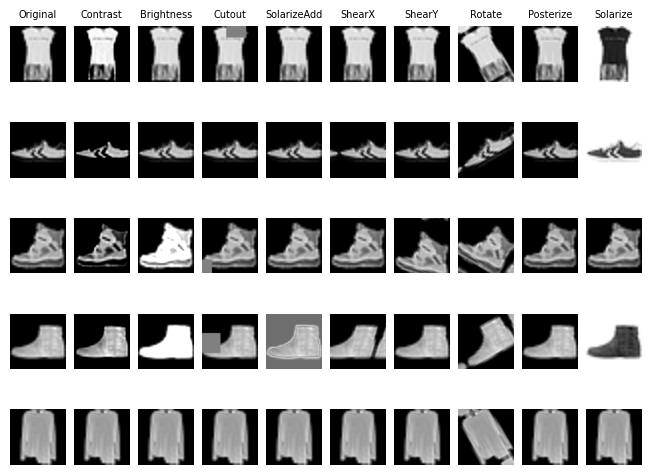

In [14]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import copy
import matplotlib.pyplot as plt
import sys
import pandas as pd
from  alo.assets.train.augment import RandAugment

def plot_auged_images(img_path_lst,resize_shape,aug_lst=None):
    
    available_aug_lst = [
        'AutoContrast', 'Equalize', 'Invert', 'Rotate', 'Posterize', 'Solarize',
        'Color', 'Contrast', 'Brightness', 'Sharpness', 'ShearX', 'ShearY',
        'TranslateX', 'TranslateY', 'Cutout', 'SolarizeAdd'
    ]
    
    if aug_lst == None:
        aug_lst = copy.deepcopy(available_aug_lst)
    
    def load_image(img_path, target_size):
        image = Image.open(img_path)
        if image is not None:
            image = np.array(image)
        else:
            raise Exception('failed to open image')

        if len(image.shape) != 3:
            image = tf.expand_dims(image, axis=-1)
        image = tf.image.resize(image, target_size)  # 이미지 리사이징
        if image.shape[2] != 3:
            image = tf.tile(image, [1, 1, 3])
        return image
    
    total_image_result = [[] for i in range(len(img_path_lst))]
    
    for img_idx , each_img_path in enumerate(img_path_lst):
        
        original_image = load_image(img_path=each_img_path,target_size=resize_shape[:2])
        total_image_result[img_idx].append(original_image)
        for each_aug in aug_lst:
            
            randaugmenter = RandAugment(num_layers=1, exclude_ops = [i for i in available_aug_lst if i != each_aug])
            auged_image = randaugmenter.distort(original_image)
            
            total_image_result[img_idx].append(auged_image)
    
    aug_lst.insert(0,'Original')
    
    fig, axes = plt.subplots(nrows=len(img_path_lst) , ncols=len(aug_lst),constrained_layout=True)
    for each_image_idx in range(len(img_path_lst)):
        for each_aug_idx in range(len(aug_lst)):
            if each_image_idx == 0:
                axes[each_image_idx][each_aug_idx].set_title(aug_lst[each_aug_idx],fontsize=7)
            axes[each_image_idx][each_aug_idx].imshow(total_image_result[each_image_idx][each_aug_idx]/255)
            axes[each_image_idx][each_aug_idx].axis('off')
                
    plt.show()
    
    
    
# 예싯 : 아래 주석을 풀어 augmented image를 확인합니다.            
train_csv_path = '/home/jovyan/icTestDir/ic/alo/input/train/train_image_paths_labels.csv'
loaded_csv = pd.read_csv(train_csv_path)
csv_lst = loaded_csv.iloc[10:15,0]

plot_auged_images(img_path_lst=csv_lst,
                  resize_shape=[224,224,3],
                  aug_lst=['Contrast', 'Brightness', 'Cutout', 'SolarizeAdd','ShearX', 'ShearY','Rotate', 'Posterize', 'Solarize'])

    
    
    

    